In [90]:
import inspect
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import bernoulli
from sklearn.ensemble import IsolationForest

In [92]:

# for solvng question take dataset from seaborn: 
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']


# Question: 01
1. Load a dataset such as the Iris dataset from sklearn. For one feature like petal length, calculate quantiles (25%, 50%, 75%), create a 5-number summary, and detect outliers.


In [6]:

df = sns.load_dataset("iris")
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()["petal_length"]

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [9]:

# find with numpy: 
print("min value: ",np.min(df["petal_length"]))
print("25% percentile: ",np.percentile(df["petal_length"],25))
print("50% percentile: ",np.percentile(df["petal_length"],50))
print("75% percentile: ",np.percentile(df["petal_length"],75))
print("Max value: ",np.max(df["petal_length"]))


min value:  1.0
25% percentile:  1.6
50% percentile:  4.35
75% percentile:  5.1
Max value:  6.9


In [72]:

# five number summary: 
# min,Q1,median,Q3,max 
# IQR = Q3 - Q1 
# Lower Fence = Q1 - 1.5*IQR
min_numb = np.min(df["petal_length"])
Q1 = np.percentile(df["petal_length"],25)
Median = np.percentile(df["petal_length"],50)
Q3 = np.percentile(df["petal_length"],75)
max_numb = np.max(df["petal_length"])
IQR = Q3 - Q1 
Lower_Fence = Q1 - 1.5*IQR 
Hiher_Fence = Q3 + 1.5*IQR


dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

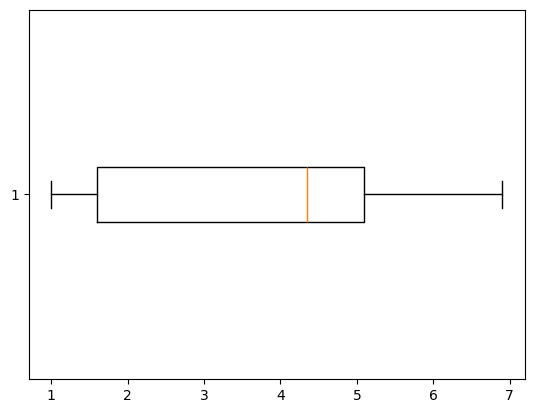

In [55]:

box = plt.boxplot(df["petal_length"],vert=False)
box.keys()


In [77]:


# As there is no outliers: upper_fench = max_num  
# lower_fench = min_num, in matplotlib 
print("min_number: ",min_numb ,"max_number: ",max_numb)
print("matplotlib lower fence: ",min(box["whiskers"][0].get_xdata()), "our calculation :",Lower_Fence)
print("matplotlib upper fence: ",max(box["whiskers"][1].get_xdata()), "our calculation :",Hiher_Fence)


min_number:  1.0 max_number:  6.9
matplotlib lower fence:  1.0 our calculation : -3.649999999999999
matplotlib upper fence:  6.9 our calculation : 10.349999999999998


In [78]:

# q1,q3,median and iqr 
q1 = min(box['boxes'][0].get_xdata())
q3 = max(box['boxes'][0].get_xdata())
median = box['medians'][0].get_xdata()[0]
iqr = q3 - q1
print("From matplotlib: ", q1,q3,median)
print("Calculated: ",Q1,Q3,Median)


From matplotlib:  1.6 5.1 4.35
Calculated:  1.6 5.1 4.35


====== Manual Calculation of Upper Fench and Lower Fench: ========
lower fence:  2.05
upper fence:  4.05
====== Matplotlib Calculation of Upper Fench and Lower Fench: ========
lower fench:  2.2
upper fench:  4.0


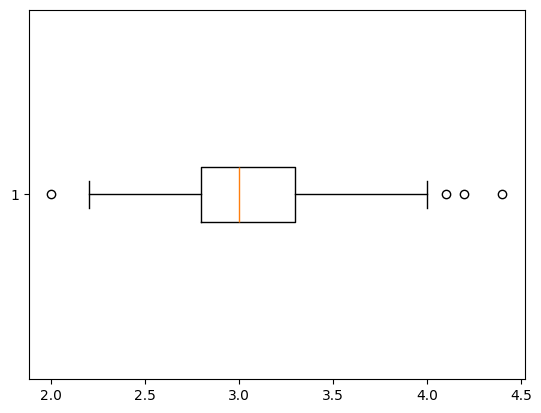

In [90]:


# if our data have outliers then: 

box_outliers = plt.boxplot(df["sepal_width"],vert=False)

print("====== Manual Calculation of Upper Fench and Lower Fench: ========")
Q1 = np.percentile(df["sepal_width"],25)
Q3 = np.percentile(df["sepal_width"],75)
IQR = Q3 - Q1 
print("lower fence: ", (Q1-1.5*IQR))
print("upper fence: ", (Q3+1.5*IQR))

print("====== Matplotlib Calculation of Upper Fench and Lower Fench: ========")
print("lower fench: ",min(box_outliers["whiskers"][0].get_xdata()))
print("upper fench: ",max(box_outliers["whiskers"][1].get_xdata()))



# Question:02 
2. Calculate covariance and correlation between two features such as height vs weight in a custom dataset. If the correlation is greater than 0.7, what does it imply? With Isolation Forest detect outliers(ques: 01). 


In [3]:

df = pd.read_csv("SOCR-HeightWeight.csv")
df.drop(columns=["Index"],inplace=True)
df.head(5)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [100]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [101]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [160]:

print("============With Pandas DataFrame============")
print(df.corr(),end="\n\n")
print("============    With Numpy  ============")
print("Height --------- Weight")
print(np.corrcoef(x=df["Height(Inches)"],y=df["Weight(Pounds)"]),end="\n\n")
print("============    With Scipy  ============")
corr,_ = pearsonr(df["Height(Inches)"],df["Weight(Pounds)"])
print(corr)



============With Pandas DataFrame============
                Height(Inches)  Weight(Pounds)
Height(Inches)        1.000000        0.502859
Weight(Pounds)        0.502859        1.000000

============    With Numpy  ============
Height --------- Weight
[[1.         0.50285852]
 [0.50285852 1.        ]]

============    With Scipy  ============
0.502858520602844


In [103]:
df.cov()

,Height(Inches),Weight(Pounds)
Height(Inches),3.616382,11.151029
Weight(Pounds),11.151029,135.976532


Mean of height: 67.99 Std of Height 1.90
Mean of Weight: 127.08 Std of Weight: 11.66


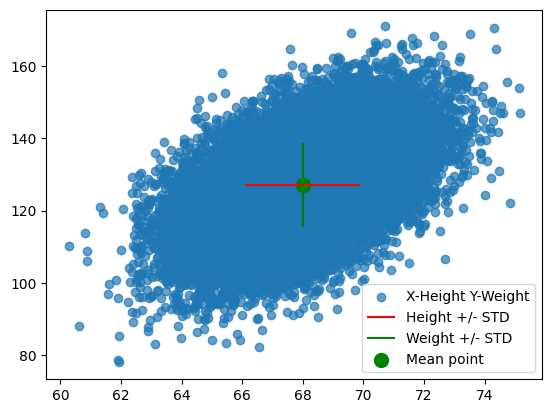

In [208]:

mean_of_height = df["Height(Inches)"].mean()
std_of_height = df["Height(Inches)"].std()
mean_of_weight = df["Weight(Pounds)"].mean()
std_of_weight = df["Weight(Pounds)"].std()

print(f"Mean of height: {mean_of_height:.2f} Std of Height {std_of_height:.2f}")
print(f"Mean of Weight: {mean_of_weight:.2f} Std of Weight: {std_of_weight:.2f}")


plt.scatter(x=df["Height(Inches)"],y=df["Weight(Pounds)"],label="X-Height Y-Weight",alpha=0.7)
plt.hlines(y=mean_of_weight,xmin=(mean_of_height-std_of_height),
           xmax=(mean_of_height+std_of_height),colors="red",label="Height +/- STD")
plt.vlines(x=mean_of_height,ymin=(mean_of_weight-std_of_weight),ymax=(mean_of_weight+std_of_weight),
           colors="g",label="Weight +/- STD")
plt.scatter(x=mean_of_height,y=mean_of_weight,c="g",s=100,label="Mean point")
plt.legend()
plt.show()




<br>

### Find Outliers with IsolationForest: [docs](https://github.com/yasin-arafat-05/machine_learning/blob/main/note/135_anomaly_algorithrm/01_isolation_forest.md)

<br>

In [16]:

train_df = df.copy()

# i think 2% data is anamaly then the value of contamination=0.02
model = IsolationForest(contamination=0.02,random_state=42,n_estimators=200)
model.fit(train_df)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.02
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [17]:

# offset calculate from contamination: 
model.offset_

np.float64(-0.6892443209932467)

In [18]:

# raw anamaly score: more_negative more_anamaly
df["anamaly_score"] = model.score_samples(train_df)

# anamaly_score - offset:
df["decision_score"] = model.decision_function(train_df)

# prediction: anamaly or not: 0 or 1 
df["prediction"] = model.predict(train_df)


In [19]:
df.head(5)

,Height(Inches),Weight(Pounds),anamaly_score,decision_score,prediction
0,65.78331,112.9925,-0.444591,0.244654,1
1,71.51521,136.4873,-0.496649,0.192596,1
2,69.39874,153.0269,-0.581205,0.108039,1
3,68.21660,142.3354,-0.425050,0.264194,1
4,67.78781,144.2971,-0.462535,0.226709,1


In [20]:

# decition_tree_score: 
df.head(5)["anamaly_score"] - model.offset_

0    0.244654
1    0.192596
2    0.108039
3    0.264194
4    0.226709
Name: anamaly_score, dtype: float64

In [21]:
df["prediction"].value_counts()

prediction
 1    24500
-1      500
Name: count, dtype: int64

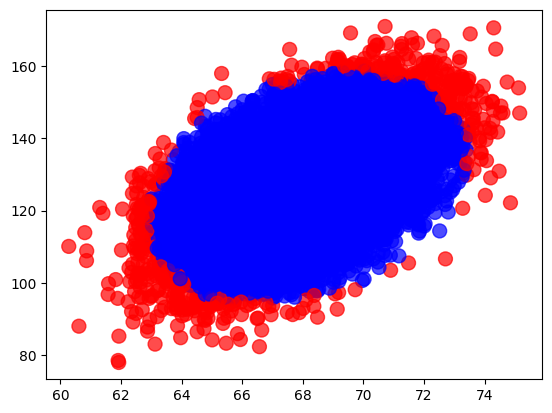

In [23]:


color = ["red" if prediction==-1 else "blue" for prediction in df["prediction"]]
plt.scatter(x=df["Height(Inches)"],y=df["Weight(Pounds)"],s=100,c=color,alpha=0.7)
plt.show()

without_contamination
 1    21137
-1     3863
Name: count, dtype: int64


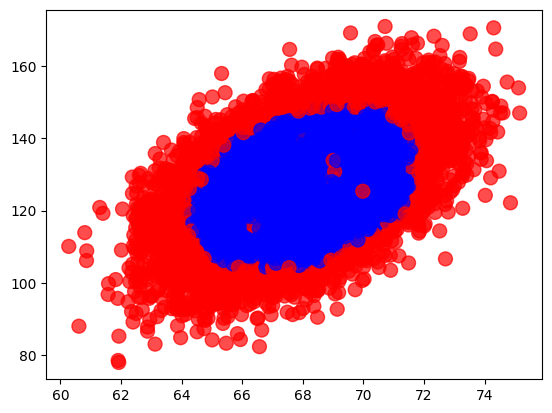

In [26]:


# train without contamination:
model = IsolationForest(contamination="auto", random_state=42)
model.fit(train_df)
df["without_contamination"] = model.predict(train_df)

print(df["without_contamination"].value_counts())

color = ["red" if prediction==-1 else "blue" for prediction in df["without_contamination"]]
plt.scatter(x=df["Height(Inches)"],y=df["Weight(Pounds)"],s=100,c=color,alpha=0.7)
plt.show()



# Question: 03
3. Simulate a coin toss experiment with 1000 trials. Calculate the PMF for a Bernoulli Distribution with p=0.5. Plot the CDF.


In [72]:

def toss():
    return np.random.randint(0,2)

num_of_expriment = 1000
head_count = tail_count = 0 
for _ in range(num_of_expriment):
    if toss()==1:
        head_count+=1 
    else: 
        tail_count+=1 
print("head_count: ",head_count,"tail_count: ",tail_count)


head_count:  483 tail_count:  517


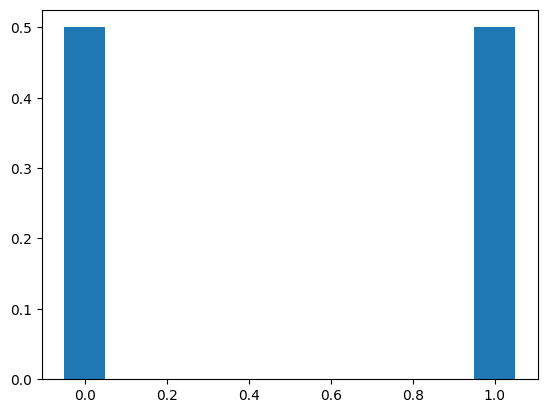

In [65]:

# bernoulli only for binary outcomes: 
x = [0,1]
pmf = bernoulli.pmf(x,p=0.5)
plt.bar(x,pmf,width=0.1) 
plt.show()


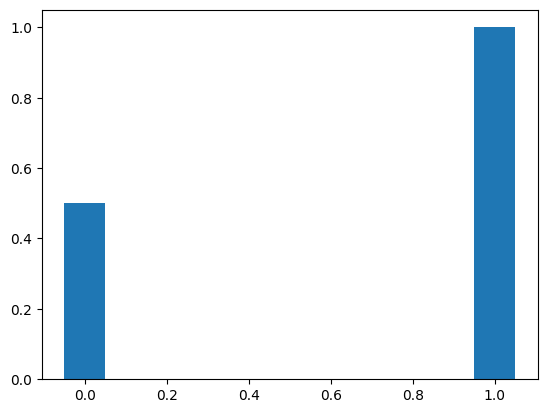

In [71]:

cdf = bernoulli.cdf(x,p=0.5)
plt.bar(x,cdf,width=0.1)
plt.show()


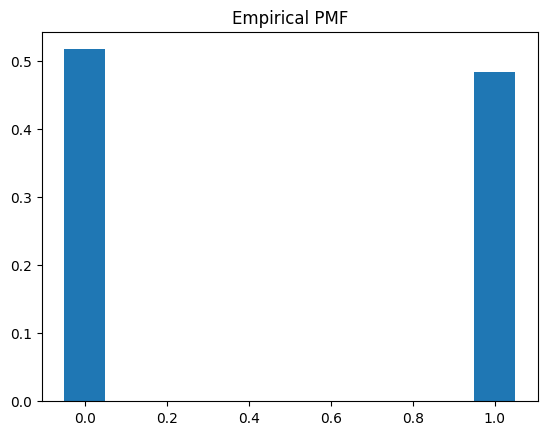

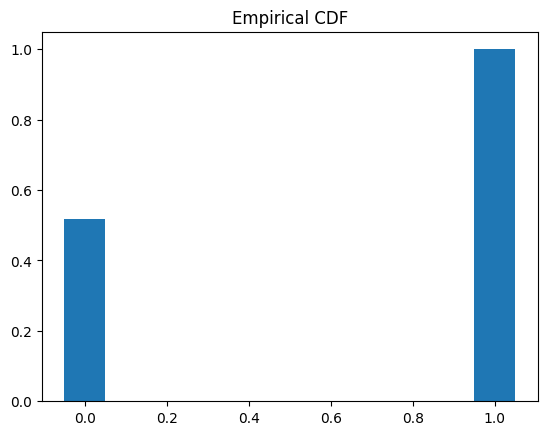

In [74]:

# without inbuild function:
emp_pmf = [tail_count / num_of_expriment, head_count / num_of_expriment]
plt.bar(x, emp_pmf, width=0.1)
plt.title("Empirical PMF")
plt.show()

# Cumulative: P(X<=0), P(X<=1)
emp_cdf = [emp_pmf[0], 1.0]  
plt.bar(x, emp_cdf, width=0.1)
plt.title("Empirical CDF")
plt.show()


4. Generate 1000 samples from a normal distribution with mean=50 and std=10. Calculate skewness, and if skewed, apply log transform to normalize.


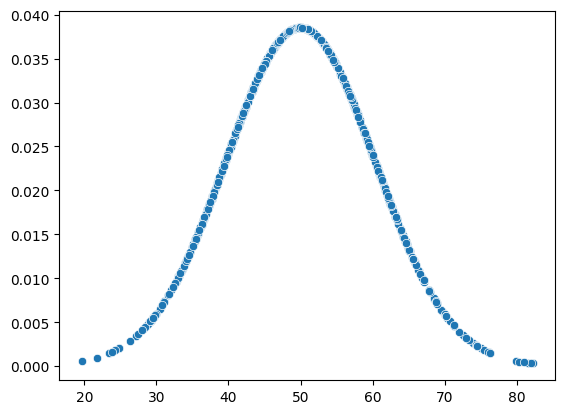

In [117]:

x = np.random.normal(loc=50,scale=10,size=1000)
loc = x.mean()
std = x.std()
pdf = norm.pdf(x,loc=loc,scale=std)
sns.scatterplot(x=x,y=pdf)
plt.show()

df = pd.DataFrame({"x":x,"pdf":pdf})


value of skewness:  0.10377404256477366
transform skewness:  0.0056791015584896085


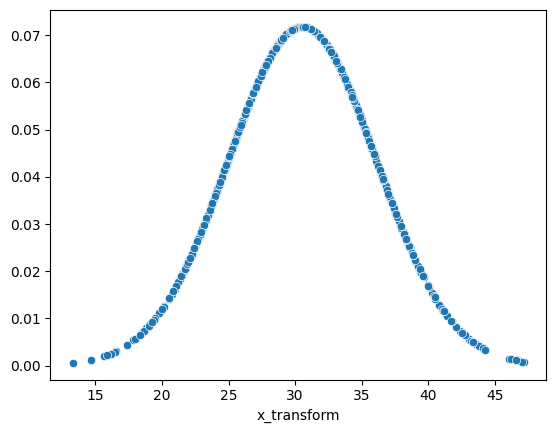

In [155]:

# ==== lam or ladma: selected by expriment ====
def box_cox_transformation(y,lam=0.8401):
    if lam==0:
        return np.log(y)
    else: 
        return (y**lam-1)/lam 


skewness = stats.skew(df['x'])
print("value of skewness: ",skewness)


if skewness>0.1:
   df["x_transform"] = df["x"].apply(box_cox_transformation)

print("transform skewness: ",stats.skew(df["x_transform"]))
loc = df["x_transform"].mean()
scale = df["x_transform"].std()


pdf = norm.pdf(df["x_transform"],loc=loc,scale=scale)
sns.scatterplot(x=df["x_transform"],y=pdf)
plt.show()


# Question: 05
5. Load a dataset such as stock prices. Calculate kurtosis and check if it is leptokurtic or platykurtic. Fit a Pareto Distribution if heavy-tailed.


# Question: 06
6. Generate 1000 samples from a Binomial Distribution with n=50 and p=0.3. Create a sampling distribution of sample means from 100 samples of size 30. Prove using CLT that the means become normal.


# Question: 07
7. From a population following a normal distribution with mean=100 and std=15, draw a sample of n=50. Calculate the point estimate (sample mean) and 95% Confidence Interval for cases where sigma is known and unknown.


8. For two groups of data in an A/B test (group A sales mean=50, group B=55, n=30 each), test the null hypothesis of no difference in means using Z-test or T-test and decide to reject or accept at alpha=0.05. Discuss Type I and Type II errors.


9. For categorical data such as a survey on gender vs preference in a 2x2 table, perform a Chi-Square test to check for independence. If dependent, perform a goodness-of-fit test.


10. For ANOVA with three groups of data such as drug types vs response, test the null hypothesis that all means are equal using F-test and decide.